# Zero Temperature Vertex Function Plots

## Imports, Declarations, and Definitions

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from mult import mult
from symmetric_point import p1_p2
from wick_rotation import to_minkowski
import zero_temperature as zt

In [6]:
eps = sp.symbols('eps')

In [7]:
def finite_part(expr):
    """Return the finite part of truncated Laurent series expr.
    
    Assumes there is no infinite part.
    """
    return expr.subs(eps, 0)

In [8]:
def corr_to_vert(corr):
    """Convert a correlator to a vertex function.
    
    Parameters:
        corr (two-element sequence of sympy object): A pySecDec (value, uncertainty) pair

    Returns:
        sympy object: vertex function value
        sympy object: vertex function uncertainty
    """
    return mult(1j, corr)

## Vertex Function Plots

In [9]:
masses = 1, 2, 3

### The Symmetric Point

In [10]:
qq_mink_grid = np.arange(-15, 30)
p1_p2_mink_grid = [p1_p2(qq) for qq in qq_mink_grid]

In [11]:
corr_results_psd = [zt.correlator_use_psd(*p1_p2, masses) for p1_p2 in p1_p2_mink_grid]
vert_results_psd = [corr_to_vert(result) for result in corr_results_psd]

In [19]:
vert_psd_re_val_plotdata = np.array([sp.re(finite_part(result[0])) for result in vert_results_psd], dtype=float)
vert_psd_re_err_plotdata = np.array([sp.re(finite_part(result[1])) for result in vert_results_psd], dtype=float)
vert_psd_im_val_plotdata = np.array([sp.im(finite_part(result[0])) for result in vert_results_psd], dtype=float)
vert_psd_im_err_plotdata = np.array([sp.im(finite_part(result[1])) for result in vert_results_psd], dtype=float)

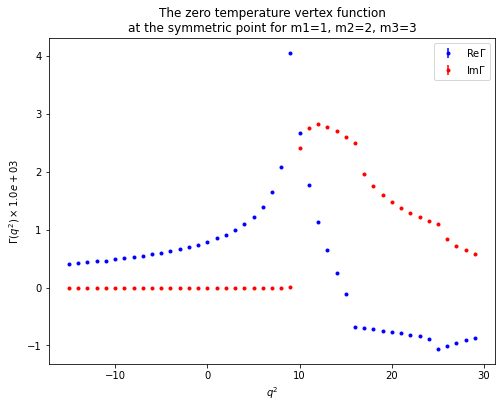

In [20]:
scale = 1e3
fig, ax = plt.subplots()
ax.errorbar(qq_mink_grid, vert_psd_re_val_plotdata * scale, vert_psd_re_err_plotdata * scale,
    label=r'$\mathrm{Re}\Gamma$', color='blue', fmt='.')
ax.errorbar(qq_mink_grid, vert_psd_im_val_plotdata * scale, vert_psd_im_err_plotdata * scale,
    label=r'$\mathrm{Im}\Gamma$', color='red', fmt='.')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times {:3.1e}$'.format(scale))
ax.set_title('The zero temperature vertex function\nat the symmetric point for m1={}, m2={}, m3={}'.format(*masses))
ax.legend(loc='upper right')
fig.set_size_inches(8, 6)

### Trapezoid Rule-Generated Data

In [13]:
num_negative_qq = len([qq for qq in qq_mink_grid if qq <= 0])
qq_mink_grid_trimmed = qq_mink_grid[:num_negative_qq]
p1_p2_mink_grid_trimmed = p1_p2_mink_grid[:num_negative_qq]
len(p1_p2_mink_grid_trimmed)

16

In [11]:
k0_eucl_grid = np.arange(-15, 15, 0.5)

In [14]:
corr_vals_trap = [zt.correlator_use_trapezoid(*p1_p2, masses, k0_eucl_grid) for p1_p2 in p1_p2_mink_grid_trimmed]

In [15]:
vertex_vals_trap = np.array([finite_part(corr_to_vert(val)) for val in corr_vals_trap])
vertex_vals_trap_re = np.array([sp.re(val) for val in vertex_vals_trap], dtype=float)
vertex_vals_trap_im = np.array([sp.im(val) for val in vertex_vals_trap], dtype=float)

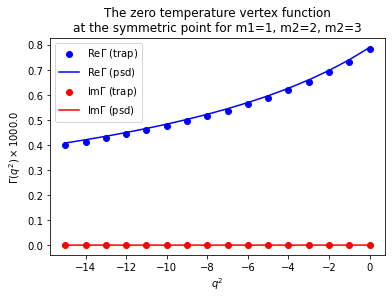

In [17]:
scale = 1e3
fig, ax = plt.subplots()
ax.scatter(qq_mink_grid_trimmed, vertex_vals_trap_re * scale,
    label=r'$\mathrm{Re}\Gamma $ (trap)', color='blue')
ax.plot(qq_mink_grid_trimmed, vertex_vals_psd_re[:num_negative_qq] * scale,
    label=r'$\mathrm{Re}\Gamma$ (psd)', color='blue')
ax.scatter(qq_mink_grid_trimmed, vertex_vals_trap_im * scale,
    label=r'$\mathrm{Im}\Gamma$ (trap)', color='red')
ax.plot(qq_mink_grid_trimmed, vertex_vals_psd_im[:num_negative_qq] * scale,
    label=r'$\mathrm{Im}\Gamma$ (psd)', color='red')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times {}$'.format(scale))
ax.set_title('The zero temperature vertex function\nat the symmetric point for m1={}, m2={}, m2={}'.format(*masses))
ax.legend(loc='upper left')

## Dimensionless Vertex Function Plots

In [5]:
xis = 1, 0.5, 0.25

In [6]:
M = 2

### Fixed a

In [7]:
beta = 0.3
a = beta * M / (2 * np.pi)

In [8]:
el_grid = np.arange(-10, 11)
qt_eucl_grid = el_grid / a
q_eucl_grid = [[qt_eucl, 0, 0, 0] for qt_eucl in qt_eucl_grid]
q_mink_grid = [to_minkowski(q_eucl) for q_eucl in q_eucl_grid]

In [10]:
dimensionless_corr_results = [zt.dimensionless_correlator_use_psd(q_mink, q_mink, xis, M) for q_mink in q_mink_grid]
dimensionless_corr_vals = [result[0] for result in dimensionless_corr_results]
dimensionless_corr_uncertainties = [result[1] for result in dimensionless_corr_results]

In [13]:
dimensionless_vertex_vals_re = np.array([sp.re(finite_part(corr_to_vert(dimensionless_corr_val))) for dimensionless_corr_val in dimensionless_corr_vals])

Text(0.5, 1.0, '$\\tilde\\Gamma$ vs $\\ell$ for a = 0.0955')

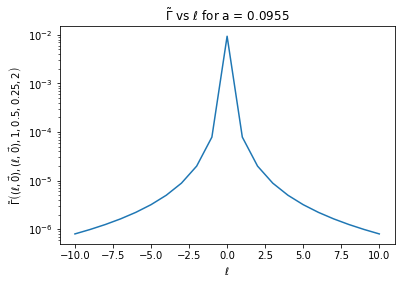

In [14]:
fig, ax = plt.subplots()
ax.plot(el_grid, dimensionless_vertex_vals_re)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\tilde\Gamma\left((\ell, \vec 0), (\ell, \vec 0), {}, {}, {}, {}\right)$'.format(*xis, M))
ax.set_yscale('log')
ax.set_title(r'$\tilde\Gamma$ vs $\ell$ for a = {:6.4f}'.format(a))

### Fixed el

In [ ]:
el = 1

In [ ]:
a_grid = np.linspace(0.1, 10.1, 25)
qt_eucl_grid = el / a_grid
q_eucl_grid = [[qt_eucl, 0, 0, 0] for qt_eucl in qt_eucl_grid]
q_mink_grid = [to_minkowski(q_eucl) for q_eucl in q_eucl_grid]

In [ ]:
dimensionless_corr_vals = [zt.dimensionless_correlator_use_psd(q_mink, q_mink, xis, M) for q_mink in q_mink_grid]

In [ ]:
dimensionless_vertex_vals_re = np.array([real_finite_part(sp.expand(dimensionless_corr_val * sp.I)) for dimensionless_corr_val in dimensionless_corr_vals])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(a_grid, dimensionless_vertex_vals_re)